# Funzioni e Grafici

## Definire una funzione

In [3]:
def multiply(a,b):
    return a*b

In [4]:
multiply(4,4)

16

## Graficare funzioni e serie di dati

In python è possibile produrre grafici dei dati che stiamo analizzando attraverso l'utilizzo della
libreria Matplotlib (https://matplotlib.org/).
Importiamo anche la libreria Numpy (https://numpy.org/) che è utilizzata per il calcolo matriciale in Python oltre a tante altre funzioni matematiche già implementate.

Importiamo entrambe le librerie nel seguente modo:

In [5]:
import matplotlib.pyplot as plt
import numpy as np

Definiamo ora una funzione più utile di quella vista prima, ad esempio quella della distribuzione gaussiana:

In [6]:
def gaussian(x,mu=0,sigma=1):
    return 1.0/(sigma*(2*np.sqrt(2*np.pi))) * np.exp(-0.5*((x-mu)/sigma)**2)

Creiamo dei punti in cui calcolare la nostra funzione usando la list comprehension vista nel blocco precendente:

In [7]:
x = [-5+0.1*i for i in range(0,100)]

Calcoliamo la nostra funzione nei punti appena generati:

In [8]:
y = [gaussian(xvalue,0,1) for xvalue in x]

Possiamo ora utilizzare queste due liste per graficare il risultato utilizzando la libreria Matplotlib:

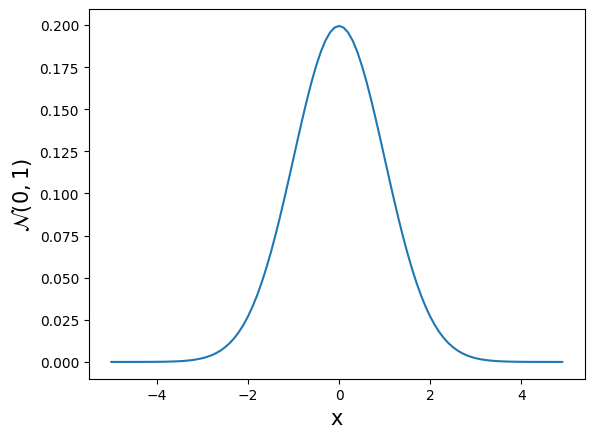

In [9]:
plt.plot(x,y)
plt.xlabel("x",fontsize=15)
plt.ylabel(r"$\mathcal{N}(0,1)$",fontsize=15)
plt.show()

Con matplotlib è possibile fare diversi tipi di grafici, vediamone altri due tipi fondamentali:


#### ScatterPlot

Consideriamo il caso comune di riportare in grafico delle misure sperimentali.

Per fare un esempio consideriamo questo set di misure su filamento di tungsteno prese attraverso l'uso di un estensimetro.

Il filo di tungsteno ha le seguenti proprietà:

1. Lunghezza a riposo: $x_0=1000\pm 2$ mm.
2. Diametro : D = $0.250 \pm 0.005$ mm.


In [10]:
# Forza Applicata in Newton
Forza_Applicata = [i*3.94 for i in range(2,12)]
Allungamento_InEstensione = [0,.22,0.435,0.64,0.85,1.065,1.283,1.485,1.695,1.91]
Allungamento_InContrazione = [0.05,0.225,0.4469,0.655,0.8635,1.09,1.295,1.50,1.71,1.91]
# Supponiamo di aver l'incertezza di 0.25 mm sulla misura dell'allungamento
Errore_Allungamento = [0.004 for a in Allungamento_InEstensione]

Mettiamo in grafico le misure:

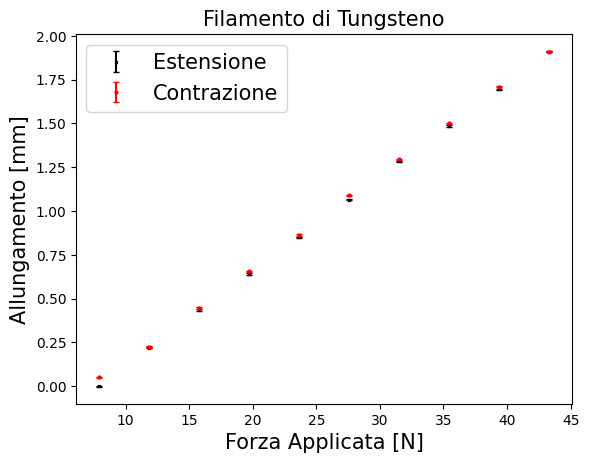

In [11]:
plt.errorbar(Forza_Applicata, Allungamento_InEstensione, Errore_Allungamento, color='black', capsize=2, linestyle='', label='Estensione', marker='x',ms=2)
plt.errorbar(Forza_Applicata, Allungamento_InContrazione, Errore_Allungamento, color='red', capsize=2, linestyle='', label='Contrazione', marker='o', ms=2)
plt.xlabel("Forza Applicata [N]", fontsize=15)
plt.ylabel("Allungamento [mm]", fontsize=15)
plt.legend(fontsize=15)
plt.title("Filamento di Tungsteno", fontsize=15)
plt.show()

## Interpolazione di serie di dati

Consideriamo ora il caso di voler estrarre, dalle misure riportate sopra, il modulo di Young del tungsteno.
Dalla Legge di Hooke abbiamo che:

$$
\Delta x \equiv x - x_0 = K \cdot F
$$
dove $x_0$ è la lunghezza del corpo non soggetto ad alcuna sollecitazione; il modulo F delle forze è preso con segno positivo quando il verso è tale da provocare un allungamento, e negativo in caso contrario.

La costante di proporzionalità K è chiamata costante elastica, da alcune considerazioni geometriche si ottiene la $\textbf{Legge di Hooke}$ per l'allungamento di un filo elastico:

$$
\Delta x = \dfrac{1}{E}\dfrac{x_0}{S} F
$$

è possibile quindi ricavare il modulo di Young nel seguente modo:

$$
E = \dfrac{x_0}{K\cdot S}
$$

Per ottenere una stima del coefficiente angolare dobbiamo interpolare i dati sperimentali. Per far questo ci avvaliamo della libreria scipy (https://scipy.org/)
che contiene diversi algoritmi fondamentali in diverse discipline scientifiche. Si importa in maniera analoga alle precedenti anche se qui per semplicità importeremo solamente il modulo che ci serve, ovvero $\texttt{curve_fit}$:

In [12]:
from scipy.optimize import curve_fit

Definiamo ora la nostra funzione lineare che rappresenta il modello teorico:

In [13]:
def p1(x,m,q):
    return m*x+q 

Facciamo ora qualche operazione con le liste per unire le due serie di dati:

In [14]:
Forza_Applicata = Forza_Applicata + Forza_Applicata
Allungamento    = Allungamento_InEstensione + Allungamento_InContrazione
Errore          = [0.004]*len(Forza_Applicata)


Grafichiamo questo nuovo set di dati 

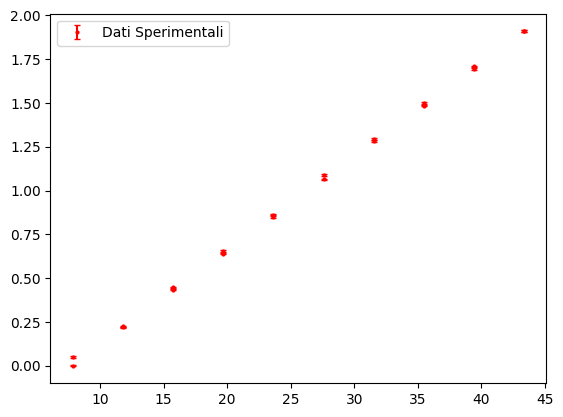

In [15]:
plt.errorbar(Forza_Applicata,Allungamento,Errore,color='red', capsize=2, linestyle='',marker='o', ms=2, label='Dati Sperimentali')
plt.legend()
plt.show()

In [16]:
parametri_best, parametri_covarianza = curve_fit(p1, Forza_Applicata, Allungamento, sigma=Errore)

In [17]:
parametri_best

array([ 0.05341947, -0.40165273])

In [18]:
parametri_covarianza

array([[ 5.56697571e-08, -1.42570248e-06],
       [-1.42570248e-06,  4.36418497e-05]])

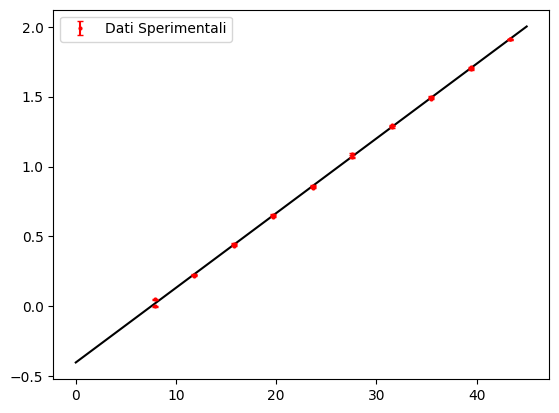

In [19]:
plt.plot(np.linspace(0,45,1000), p1(np.linspace(0,45,1000),*parametri_best), color='black')
plt.errorbar(Forza_Applicata,Allungamento,Errore,color='red', capsize=2, linestyle='',marker='o', ms=2, label='Dati Sperimentali')
plt.legend()
plt.show()

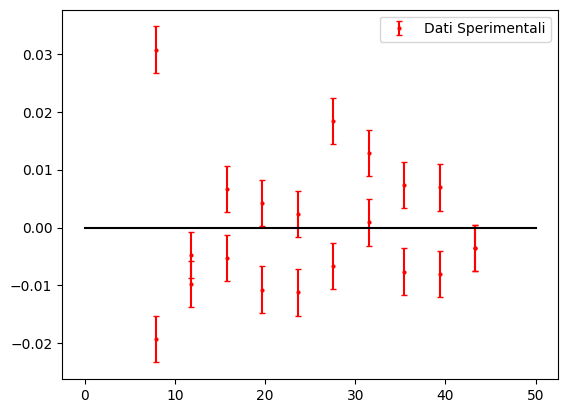

In [20]:
plt.plot(np.linspace(0,50,1000), np.zeros(1000), color='black')
plt.errorbar(Forza_Applicata,Allungamento-p1(np.array(Forza_Applicata),*parametri_best),Errore,color='red', capsize=2, linestyle='',marker='o', ms=2, label='Dati Sperimentali')
plt.legend()
plt.show()

In [21]:
E = (4*1000)/(np.pi*parametri_best[0]*0.250*0.250*1e-6)

Propaghiamo ora le incertezze:
    
$$
\sigma_E = E \sqrt{\left(\dfrac{\sigma_{x_0}}{x_0} \right)^2 + \left( \dfrac{\sigma_k}{k} \right)^2 + \left( \dfrac{\sigma_D}{D} \right)^2}
$$

In [35]:
sigma_E = E * np.sqrt( (2.0/1000)**2 + (np.sqrt(parametri_covarianza[0,0])/parametri_best[0])**2 + (0.005/0.250)**2 )

In [36]:
print("La misura del modulo di Young del Tungsteno risulta essere quindi",np.round(E*1e-10,1),"±",np.round(sigma_E*1e-10,1),"x 10^10 N/m^2" )

La misura del modulo di Young del Tungsteno risulta essere quindi 38.1 ± 0.8 x 10^10 N/m^2


Il valore di riferimento è E = $38 \times N/m^2$ che risulta compatibile con la misura:

$$
\lambda = \dfrac{E^{reference}-E^{misura}}{\sqrt{ {\sigma_E^{reference}}^2 + {\sigma_E^{misura}}^2 } } = 0.125 
$$